# DBSCAN (Density Based Spatial Clustering of Applications with Noise)
복잡한 기하학적 분포도를 가진 데이터 세트에 대한 군집화 수행에 필요

주요 파라미터
epsilon (입실론 주변 영역): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
min points (최소 데이터 개수): 입실론 주변 영역에 포함되는 타 데이터 개수

데이터 포인트 정의
Core Point (핵심 포인트): 주변 영역 내 최소 데이터 개수 이상의 타 데이터를 가진 경우
Neighbor Point (이웃 포인트): 주변 영역 내 위치한 타 데이터
Border Point (경계 포인트): 주변 영역 내 최소 데이터 개수 이상의 이웃 포인트 X,
                핵심 포인트를 이웃 포인트 O
Noise Point (잡음 포인트): 최소 데이터 개수 이상의 이웃 포인트 X, 핵심 포인트를 이웃 포인트 X

## 붓꽃 데이터 세트 적용하기

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF["target"] = iris.target
dbscan = DBSCAN(eps=0.6, min_samples=8, metric="euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF["dbscan_cluster"] = dbscan_labels
irisDF["target"] = iris.target

iris_result = irisDF.groupby(["target"])["dbscan_cluster"].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [6]:
# visualize cluster
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise = False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise = True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, \
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', \
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

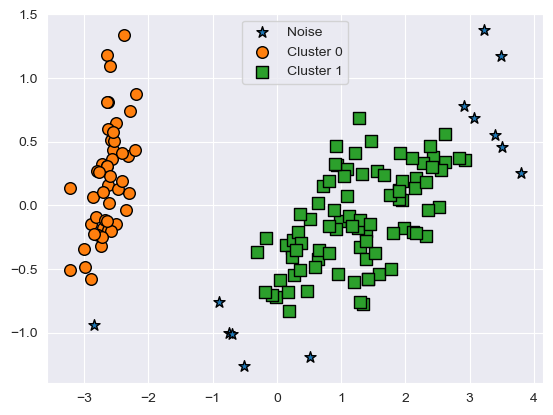

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

irisDF["ftr1"] = pca_transformed[:, 0]
irisDF["ftr2"] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, "dbscan_cluster", False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


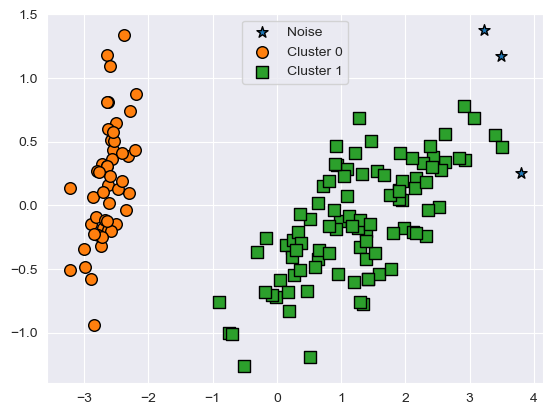

In [10]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric="euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF["dbscan_cluster"] = dbscan_labels
irisDF["target"] = iris.target

iris_result = irisDF.groupby(["target"])["dbscan_cluster"].value_counts()
print(iris_result)

visualize_cluster_plot(None, irisDF, "dbscan_cluster", False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


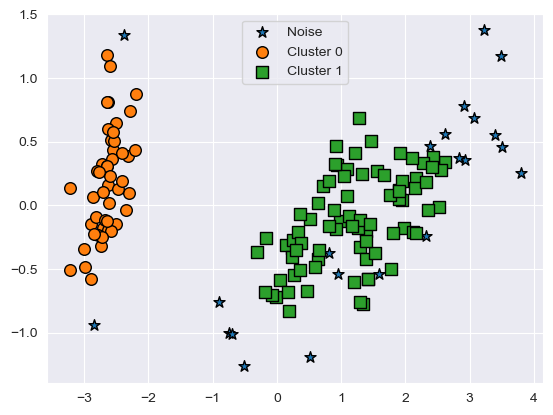

In [13]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric="euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF["dbscan_cluster"] = dbscan_labels
irisDF["target"] = iris.target

iris_result = irisDF.groupby(["target"])["dbscan_cluster"].value_counts()
print(iris_result)

visualize_cluster_plot(None, irisDF, "dbscan_cluster", False)

## Apply DBSCAN - make_circles() dataset

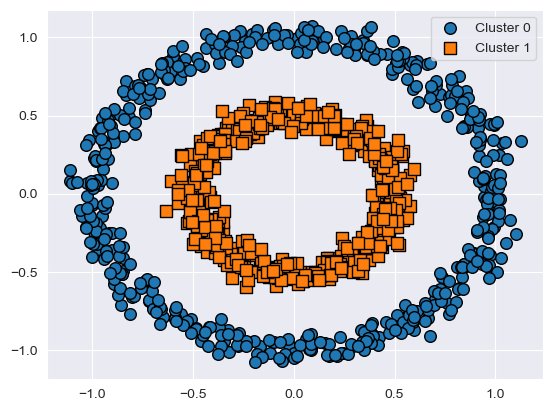

In [14]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=["ftr1", "ftr2"])
clusterDF["target"] = y

visualize_cluster_plot(None, clusterDF, "target", False)

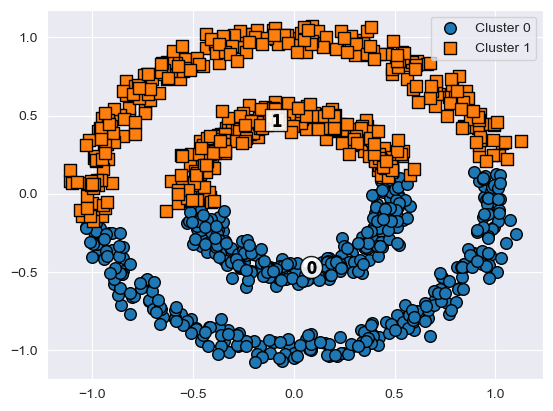

In [16]:
# make_circles() data set clustering using KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF["kmeans_cluster"] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, "kmeans_cluster", True)

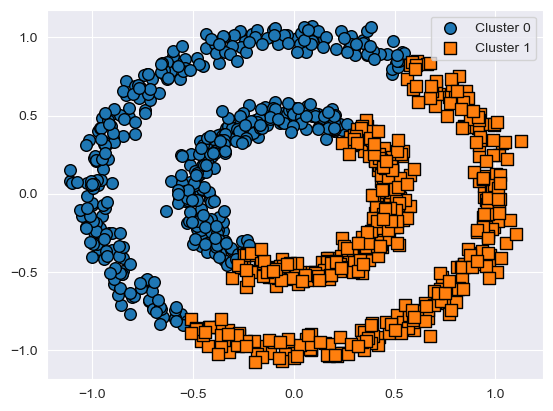

In [17]:
# make_circles() data set clustering using GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF["gmm_cluster"] = gmm_label

visualize_cluster_plot(gmm, clusterDF, "gmm_cluster", iscenter=False)

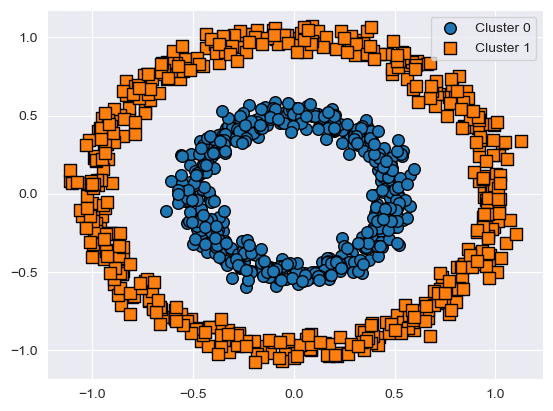

In [18]:
# make_circles() data set clustering using DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric="euclidean")
dbscan_labels = dbscan.fit_predict(X)
clusterDF["dbscan_cluster"] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, "dbscan_cluster", iscenter=False)